# <span style="color: hotpink">Project 1: Classification
### <span style="color: hotpink">Fabiola Rojas</span>
---

### <span style="color: hotpink">The Problem</span> 
Family planning plays a crucial role in public health and economic stability, yet contraceptive use varies significantly based on demographic and socioeconomic factors. Understanding what influences contraceptive choices can help policymakers and healthcare providers develop better strategies for reproductive health education and access.

I aim to build a classification model that predicts a woman's contraceptive method choice based on various factors such as education, employment status, and standard of living. I will use the following questions to help uncover insights about the dataset: 

- What is the most common contraceptive method?
- How are the socioeconomic features distributed?
- Does a husband's education and occupation affect their wife's contraceptive method choice?
- What are the differences in contraceptive methods based on demographics and socioeconomic factors?
- What combinations of factors are most likely to lead to certain choice of contraceptive method? (For example, low education and low standard of living.)

The insights gained from this analysis could help improve family planning policies by identifying key socioeconomic barriers to contraceptive use.

---

### <span style="color: hotpink">The Data</span> 
The [dataset](https://archive.ics.uci.edu/dataset/30/contraceptive+method+choice) is a subset of the 1987 National Indonesia Contraceptive Prevalence Survey. It consists of records of married women who were either not pregnant or were unsure of their pregnancy status at the time of the interview. The dataset contains 10 variables that capture demographic and socioeconomic characteristics of the women surveyed, including their age, education level, number of children, religious affiliation, employment status, and exposure to media.

The target variable, contraceptive_method, has three categories: 
- 1 = No-use (The woman does not use any contraceptive method)
- 2 = Long-term method (e.g., IUD, sterilization)
- 3 = Short-term method (e.g., pill, condom, injection)
  
The categorical variables have already been encoded as numerical values, making it easier for machine learning models to process. A key aspect of this project will be understanding the relationships between these features and contraceptive choices through data visualization and classification modeling.

---

<span style="color: purple">The dataset is not available as a csv or spreadsheet, so I will have to fetch it directly from the UCI repository.

In [5]:
#pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset from UC Irvine Machine Learning Repository
contraceptive_method_choice = fetch_ucirepo(id=30) 
  
# data as pandas dataframes 
X = contraceptive_method_choice.data.features 
y = contraceptive_method_choice.data.targets 


<span style="color: purple">Now I can work with it as a pandas dataframe.

In [8]:
import pandas as pd

df = pd.concat([X, y], axis=1)

df.head()

,wife_age,wife_edu,husband_edu,num_children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [9]:
df.shape

(1473, 10)

In [10]:
df.columns

Index(['wife_age', 'wife_edu', 'husband_edu', 'num_children', 'wife_religion',
       'wife_working', 'husband_occupation', 'standard_of_living_index',
       'media_exposure', 'contraceptive_method'],
      dtype='object')

<span style="color: purple">I'm going ahead and creating lists storing the categorical and numerical columns separately for when I visualize them later on.

In [12]:
cat_cols = ['wife_edu', 'husband_edu', 'wife_religion', 'wife_working', 
            'husband_occupation', 'standard_of_living_index', 'media_exposure',  
            'contraceptive_method']

num_cols = ['wife_age', 'num_children']

<span style="color: purple">The dataset information on the UCI site says there are no missing values but I am going to check just in case. I'll also confirm that the data types are all integers, and that the categorical columns only contain the expected values (0-4).

In [14]:
df.isnull().sum()

wife_age                    0
wife_edu                    0
husband_edu                 0
num_children                0
wife_religion               0
wife_working                0
husband_occupation          0
standard_of_living_index    0
media_exposure              0
contraceptive_method        0
dtype: int64

In [15]:
df.dtypes

wife_age                    int64
wife_edu                    int64
husband_edu                 int64
num_children                int64
wife_religion               int64
wife_working                int64
husband_occupation          int64
standard_of_living_index    int64
media_exposure              int64
contraceptive_method        int64
dtype: object

<span style="color: purple">All the values are numerical so I don't have to encode the categorical values.

In [17]:
for col in cat_cols:
    print(df[col].value_counts())
    print()

wife_edu
4    577
3    410
2    334
1    152
Name: count, dtype: int64

husband_edu
4    899
3    352
2    178
1     44
Name: count, dtype: int64

wife_religion
1    1253
0     220
Name: count, dtype: int64

wife_working
1    1104
0     369
Name: count, dtype: int64

husband_occupation
3    585
1    436
2    425
4     27
Name: count, dtype: int64

standard_of_living_index
4    684
3    431
2    229
1    129
Name: count, dtype: int64

media_exposure
0    1364
1     109
Name: count, dtype: int64

contraceptive_method
1    629
3    511
2    333
Name: count, dtype: int64



In [18]:
df['contraceptive_method'].value_counts(normalize=True)

contraceptive_method
1    0.427020
3    0.346911
2    0.226069
Name: proportion, dtype: float64

<span style="color: purple">Something of note is that the target classes are pretty imbalanced and may require class weights or rebalancing before we get to the modeling. Standardization or normalization may also be helpful especially for distance-based models.

<span style="color: purple">Everything else looks good so I won't be needing to do any more preprocessing at the moment. Here are the definitions of the class values for each of the categorical columns. (The values for husband's occupation are not explicitly defined in the dataset information.)

| Class Value       | Wife's Education | Husband's Education | Wife's Religion | Wife Working | Husband's Occupation | Standard of Living Index | Media Exposure | Contraceptive Method Used |
|------------------|-----------------|------------------|--------------|-------------|------------------|----------------------|--------------|------------------------|
| **0**            |                 |                  | Non-Islam    | Yes         |                  |                      | Good         |                        |
| **1**            | Low             | Low              | Islam        | No          | Category 1       | Low                  | Not good     | No-use                 |
| **2**            |                 |                  |              |             | Category 2       |                      |              | Long-term              |
| **3**            |                 |                  |              |             | Category 3       |                      |              | Short-term             |
| **4**            | High            | High             |              |             | Category 4       | High                 |              |                        |

---

## <span style="color: hotpink">Data Understanding/Visualization

### <span style="color: hotpink">Categorical Features

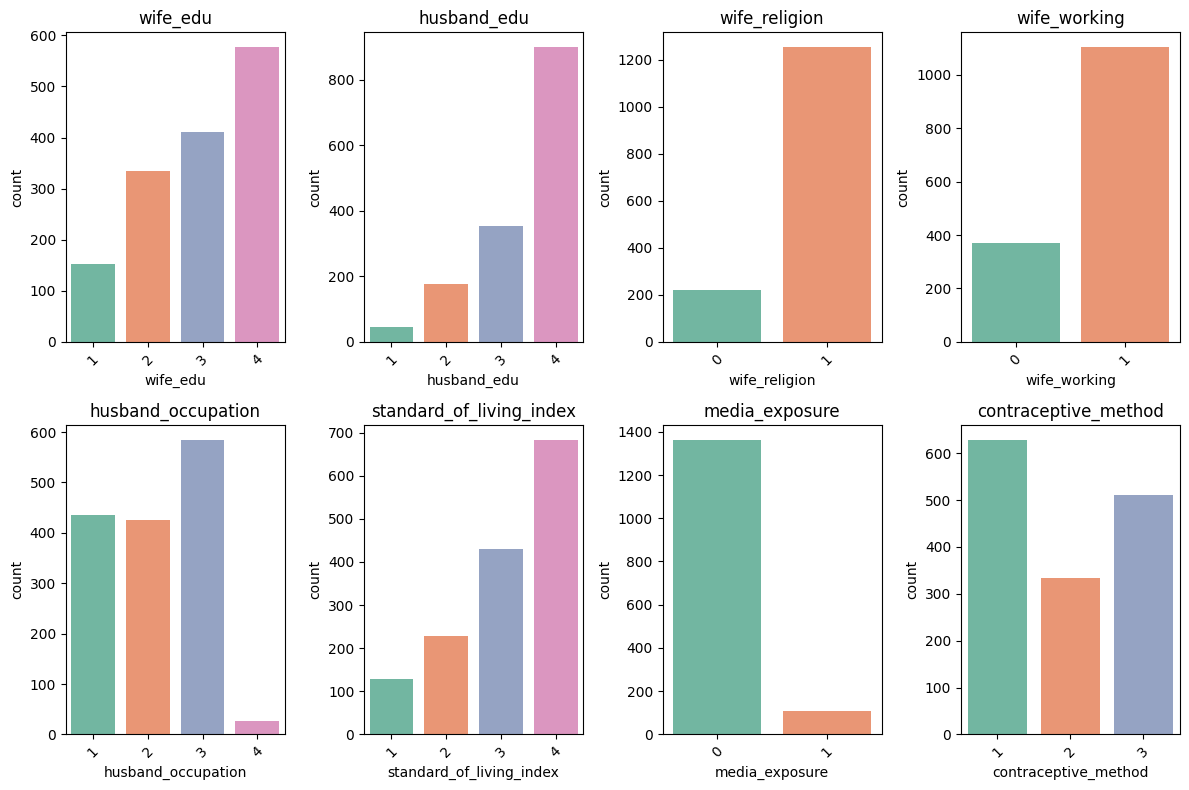

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 4, figsize=(12, 8))

for ax, col in zip(axes.flatten(), cat_cols):
    sns.countplot(x=df[col], ax=ax, hue=df[col], palette="Set2", dodge=False)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45) 
    if ax.get_legend() is not None:
        ax.get_legend().remove()

plt.tight_layout()
plt.show()


<span style="color: purple">We can learn a lot from a preliminary visualization of the features. It looks like higher education is most common among married couples with most husbands being very highly educated, but the wife is usually less educated than the husband.  

<span style="color: purple">Most wives are employed and even more are muslim. My brief research of Islam and birth control revealed that the Quran does not explicitly mention birth control and therefore most Islamic scholars permit it. The religion is however very family oriented, so sterilization is forbidden, but intepretations regarding abortion and birth control tend to vary. It is unlikely that religion has a strong correlation to use of birth control in this case, but it will be interesting to see what the distribution of contraceptive methods looks like for each class.  

<span style="color: purple">As for employment, most wives are employed, so they could be taking time to work and are not trying to get pregnant, or they could be building a family. Unemployed wives may be unemployed to take care of their children, and hopefully they are taking necessary measures to maintain financial security, but it is possible that a combination of factors leave them unable to use contraception. Most husbands fall under classes 1, 2, and 3. We don't know what these classes stand for, but it is likely that they are different types of jobs or different salary ranges. Based on the pattern in the data, group 4 probably means unemployed.  

<span style="color: purple">Standard of living is generally high but about a quarter of the data reflects lower living standards. I'm not sure what exactly is the measure of living standards, but it could be related to income and the physical community. As this data is a subset of a much larger dataset, it is likely this feature comes from a combination of many of the original variables, such as source of drinking water, has refrigerator, has electricity, main floor material, etc.

<span style="color: purple">Most of the media exposure is "good." I'm not sure if this just means a high exposure to media or a positive exposure. The original dataset includes variables for listening to the radio, watching TV, and reading the newspaper, so I can assume this feature is just based on frequency of media exposure, although information gained from these different medias may be of differing values as in relation to contraception.

<span style="color: purple">Most women in this dataset use no contraceptive method and only about a quarter use long-term methods. We can find out what features align with women who are actively preventing pregnancy, and see if those with no contraception use are much different from these women or if it's simply due to lack of education and media exposure.

In [25]:
df[cat_cols].describe()

,wife_edu,husband_edu,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method
count,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
mean,2.958588,3.429735,0.850645,0.749491,2.137814,3.133741,0.073999,1.919891
std,1.014994,0.816349,0.356559,0.433453,0.864857,0.976161,0.261858,0.876376
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,2.000000,3.000000,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000
50%,3.000000,4.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000
75%,4.000000,4.000000,1.000000,1.000000,3.000000,4.000000,0.000000,3.000000
max,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,1.000000,3.000000


contraceptive_method
1    0.427020
3    0.346911
2    0.226069
Name: proportion, dtype: float64


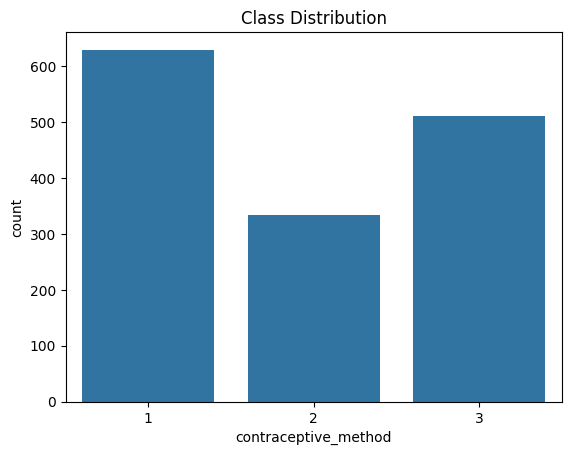

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class distribution
print(df['contraceptive_method'].value_counts(normalize=True))  # Proportions
sns.countplot(x=df['contraceptive_method'])
plt.title("Class Distribution")
plt.show()


### <span style="color: hotpink">Numerical Features

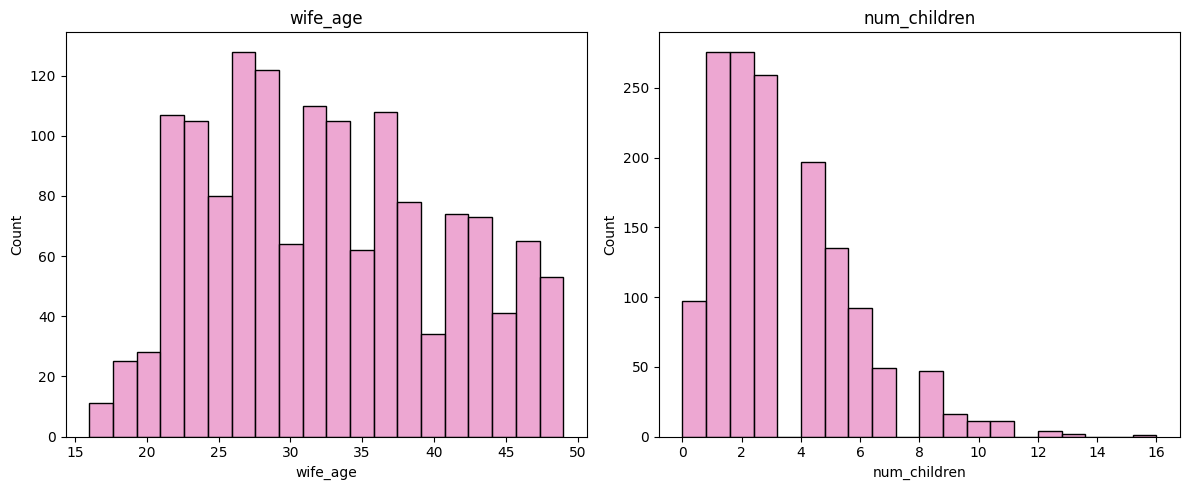

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):  
    sns.histplot(df[col], ax=axes[i], bins=20, color='#e78ac3')
    axes[i].set_title(col)

for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<span style="color: purple">Most women are in their late twenties to early thirties which is the expected range for this study, but ages range from 16 to 49. Most women have at least 1-3 children, few have no children, and fewer have more than 8.

In [30]:
df[num_cols].describe()

,wife_age,num_children
count,1473.000000,1473.000000
mean,32.538357,3.261371
std,8.227245,2.358549
min,16.000000,0.000000
25%,26.000000,1.000000
50%,32.000000,3.000000
75%,39.000000,4.000000
max,49.000000,16.000000


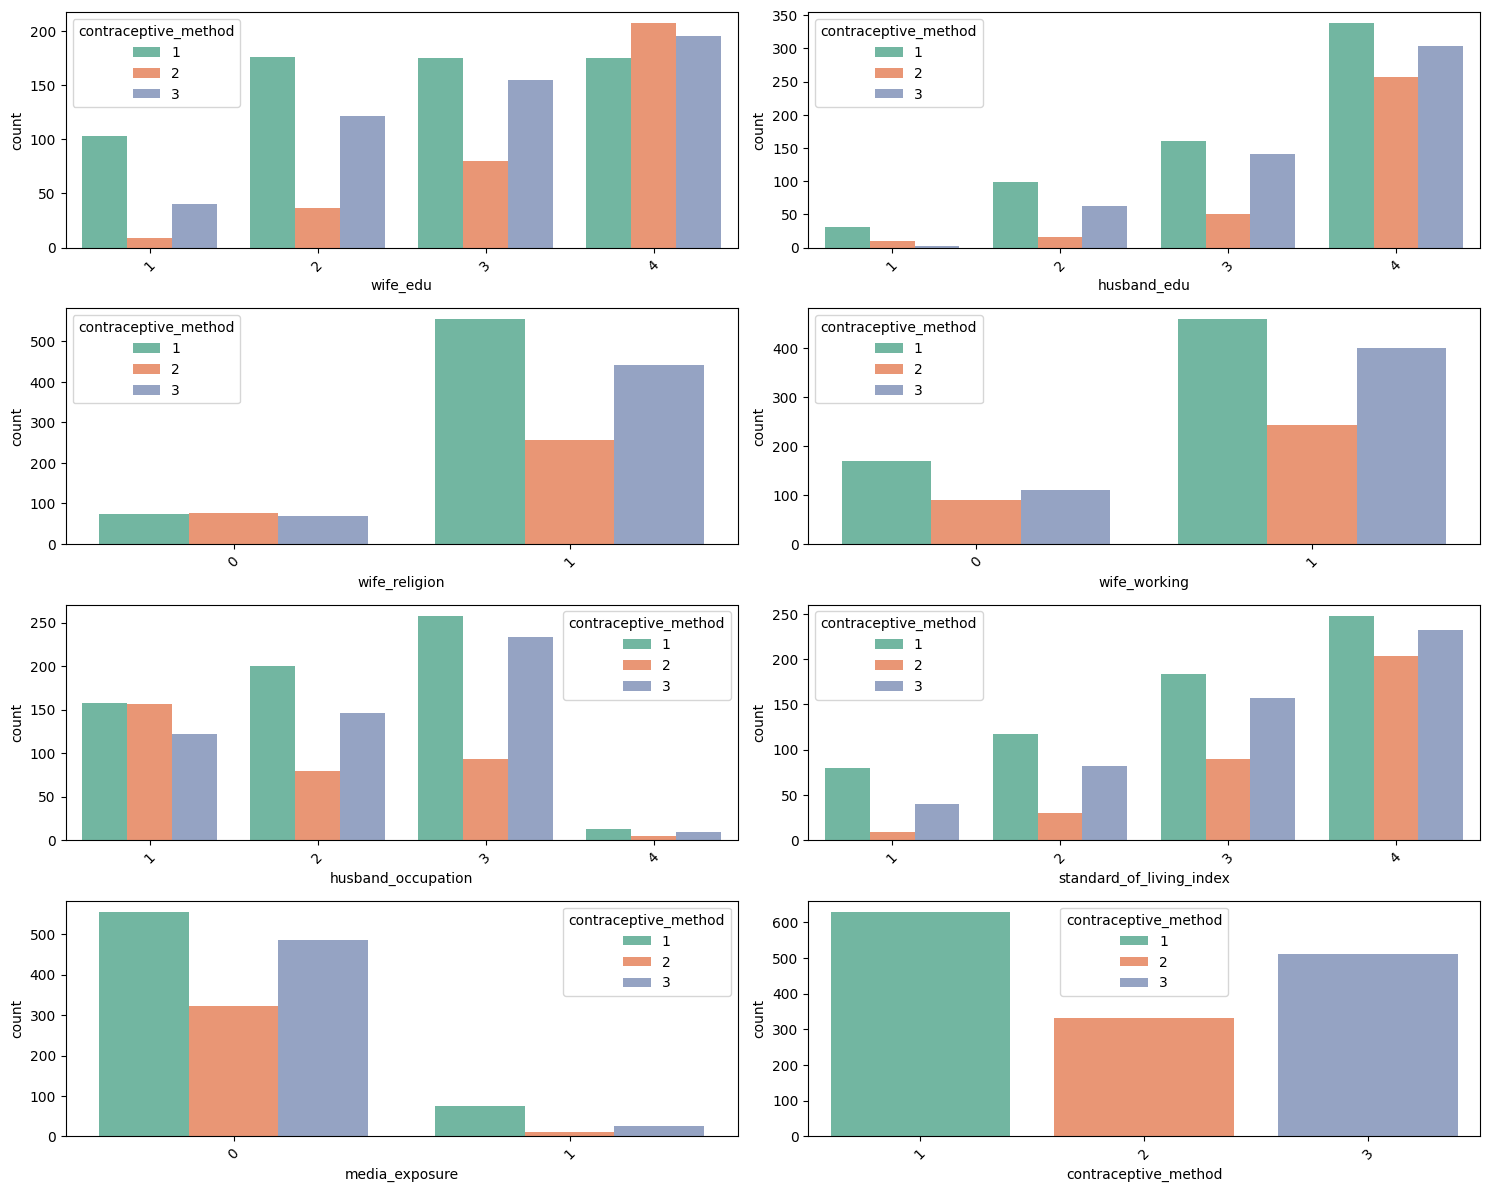

In [31]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12)) 
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue='contraceptive_method', data=df, palette='Set2', ax=axes[i])
    axes[i].set_title('')
    axes[i].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

<span style="color: purple">Overall, the most common contraceptive method in almost every category is no use. The only two exceptions are when the wife's religion is non-Islam, in which no use is barely beat out by long-term methods, and when the wife has a high education level, in which long- and short-term methods surpass no use. Short-term methods tend to be the next most common aside from a few exceptions including husband occupation level 1 (maybe a lower income job), low husband education level, and not-Islam religious affiliation.  

<span style="color: purple">All of these features seem to be significant in determining contraceptive use. There is a direct trend between contraceptive use and education levels as well as standard of living. Non-Islamic, non-working wives with low media exposure and education levels are less likely to use any form of contraception, however no use is still the most common among the other classes even with the prevalence of other methods.

<Axes: xlabel='contraceptive_method', ylabel='wife_age'>

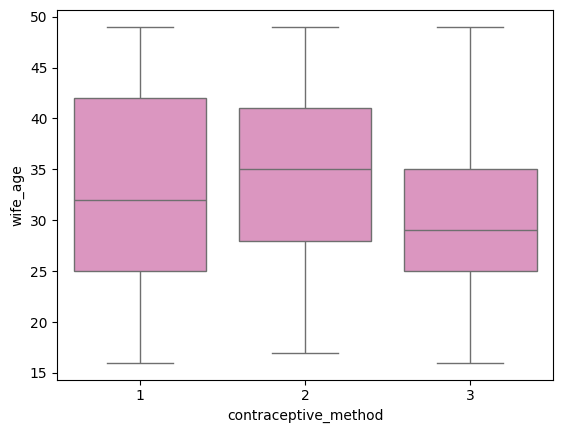

In [33]:
sns.boxplot(x='contraceptive_method', y='wife_age', data=df, color='#e78ac3')

<span style="color: purple">The range of ages for each method is pretty even. No use has the widest spread. It makes sense for no use to reach into the higher ages as contraception is not necessary past a certain point in a woman's life. Long-term methods have a smaller spread and is more centered at the higher ages. Women are likely choosing to prevent pregnancy past a certain age. Short-term methods fall in the slightly younger age group, women who may still choose to become pregnant or don't have access to or knowledge of long-term methods.

<Axes: xlabel='contraceptive_method', ylabel='num_children'>

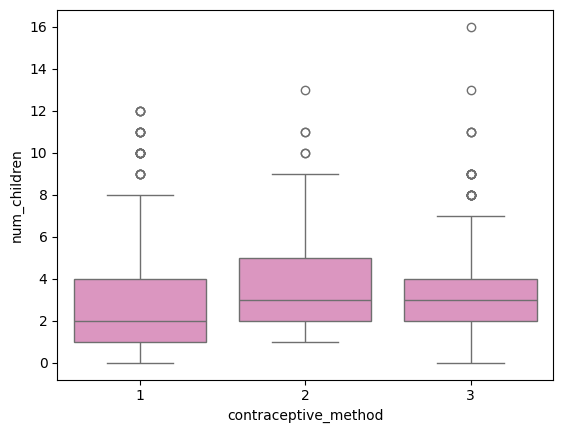

In [35]:
sns.boxplot(x='contraceptive_method', y='num_children', data=df, color='#e78ac3')


<span style="color: purple">All three methods have outliers, similarly sized ranges and spreads. Surprisingly, long-term use has a higher range and high outliers. One would think long-term users would have less children. Based on the previous graph, long-term methods are more common among older women, so perhaps they are having more children first and then switching to long-term methods.

## <span style="color: hotpink">Modeling

<span style="color: purple">Before proceeding with the modeling, I need to consider a few things. First, the class imbalance in the target variable. I can either use the class weight parameter in the models to adjust for imbalance automatically, or I can alter the original dataset using resampling techniques. Next, the wife_age and num_children features are quantitative and should be scaled for better performance with SVM and KNN since they rely on distance calculations. I can start by experimenting with random forest models as a baseline and compare their performances to the scaled, rebalanced, and tuned models. Precision, recall, and f1-score will be important metrics to evaluate as they are better reflections of model performance for imbalanced data.

### <span style="color: hotpink">Random Forest

<span style="color: purple">First I'll try a random forest model with no weights, rebalancing, or scaling, just so we can see how the model improves. Random forest is an ensemble method that builds multiple decision trees and combines their outputs via majority voting (classification) or averaging (regression). It handles large datasets well, reduces overfitting, and provides feature importance but can be slow and less interpretable.

#### <span style="color: hotpink">Baseline

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# train test split
X = df.drop(columns=['contraceptive_method']) # predictors
y = df['contraceptive_method'] # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, 
                                                    stratify=y) # stratified to balance class 
                                                                # dist in train and test sets


# train and fit
rf_base = RandomForestClassifier(random_state=42, max_depth=10).fit(X_train, y_train)

# prediction
y_pred = rf_base.predict(X_test)

# evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.63      0.61      0.62       126
           2       0.45      0.33      0.38        67
           3       0.50      0.61      0.55       102

    accuracy                           0.55       295
   macro avg       0.53      0.52      0.52       295
weighted avg       0.54      0.55      0.54       295

Confusion Matrix:
[[77 12 37]
 [20 22 25]
 [25 15 62]]


<span style="color: purple">Class 1 (no use) is the strongest class with decent metrics. Class 2 (long-term) is the weakest, which makes sense as it is the least represented class. With an accuracy of 55%, this model is not performing well enough. Let's see if class weights make a significant difference.

#### <span style="color: hotpink">Class Weight

In [45]:
# train and fit
rf_weighted = RandomForestClassifier(class_weight="balanced", random_state=42, max_depth=10).fit(X_train, y_train)

# prediction
y_pred = rf_weighted.predict(X_test)

# evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.56      0.61       126
           2       0.40      0.43      0.42        67
           3       0.51      0.59      0.55       102

    accuracy                           0.54       295
   macro avg       0.53      0.53      0.53       295
weighted avg       0.56      0.54      0.55       295

Confusion Matrix:
[[71 18 37]
 [17 29 21]
 [17 25 60]]


<span style="color: purple">There is a slight improvement in some of the metrics for class 2, but overall the model is still pretty weak. Let's try resampling.

In [47]:
#pip install imbalanced-learn

#### <span style="color: hotpink">Resampling

In [49]:
from imblearn.over_sampling import SMOTE

# re-split without strafify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# resample and re-fit
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Class distribution after resampling: {y_train_resampled.value_counts()}")


Class distribution after resampling: contraceptive_method
1    435
2    435
3    435
Name: count, dtype: int64


In [50]:
# train and fit
rf_resampled = RandomForestClassifier(class_weight="balanced", random_state=42, max_depth=10).fit(X_train, y_train)

# prediction
y_pred = rf_resampled.predict(X_test)

# evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.56      0.64       194
           2       0.44      0.47      0.45       101
           3       0.50      0.65      0.57       147

    accuracy                           0.57       442
   macro avg       0.57      0.56      0.55       442
weighted avg       0.60      0.57      0.57       442

Confusion Matrix:
[[108  28  58]
 [ 16  47  38]
 [ 18  33  96]]


<span style="color: purple">There is significant improvement in this resampled model, but it is still struggling with class 2, misclassifying it more often than correctly classifying it. Let's try another model.

### <span style="color: hotpink">Categorical Naive Bayes

<span style="color: purple">I will be trying Categorical Naive Bayes next with the resampled data as it does not require scaling and can handle the categorical features. Categorical Naive Bayes is a probabilistic classifier based on Bayes' theorem, designed for categorical data. It is fast, works well with small datasets, and handles missing data but assumes feature independence, which may reduce accuracy in correlated datasets.

In [54]:
from sklearn.naive_bayes import CategoricalNB

# train and fit
nb = CategoricalNB().fit(X_train_resampled, y_train_resampled)

# prediction
y_pred = nb.predict(X_test)

# evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.52      0.59       194
           2       0.42      0.56      0.48       101
           3       0.48      0.50      0.49       147

    accuracy                           0.52       442
   macro avg       0.52      0.53      0.52       442
weighted avg       0.55      0.52      0.53       442

Confusion Matrix:
[[101  42  51]
 [ 14  57  30]
 [ 35  38  74]]


<span style="color: purple">This model has improvements in some areas but is weaker in others. For example, it is better at correctly predicting true positives (recall) for class 2 but worse for class 3. Class 3 is misclassified as often as it is correctly classified. Let's see if scaling makes a difference.

#### <span style="color: hotpink">Scaling

<span style="color: purple">I'm not sure which scaler I should use, and I'm not sure whether to scale only the quantitative variables or all of them including the categorical variables. Since the categorical variables all fall in similar ranges and don't represent continuous values, they probably won't need to be scaled, so I'll leave them alone for now. wife_age is more normally distributed, so I will try standardization, while num_children is very skewed, so I will try normalization.

In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

# fit resampled train sets
standard_scaler.fit(X_train_resampled[['wife_age']])
min_max_scaler.fit(X_train_resampled[['num_children']])

# transform resampled train sets
X_train_resampled[['wife_age']] = standard_scaler.transform(X_train_resampled[['wife_age']])
X_train_resampled[['num_children']] = min_max_scaler.transform(X_train_resampled[['num_children']])

# transform test set
X_test[['wife_age']] = standard_scaler.transform(X_test[['wife_age']])
X_test[['num_children']] = min_max_scaler.transform(X_test[['num_children']])

In [59]:
X_train_scaled = X_train_resampled.copy()

# train and fit
rf_scaled = RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=10).fit(X_train_scaled, y_train_resampled)

# prediction
y_pred = rf_scaled.predict(X_test)

# evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.52      0.63       194
           2       0.42      0.50      0.46       101
           3       0.50      0.65      0.57       147

    accuracy                           0.56       442
   macro avg       0.57      0.56      0.55       442
weighted avg       0.61      0.56      0.57       442

Confusion Matrix:
[[101  36  57]
 [ 12  51  38]
 [ 16  35  96]]


<span style="color: purple">This random forest with resampling and scaling performs better. Let's try out some other models where scaling is very important.

### <span style="color: hotpink">KNN

<span style="color: purple">K-Nearest Neighbors is a distance-based algorithm that classifies a data point based on the majority class among its k nearest neighbors. It is simple and works well with small datasets but can be slow for large datasets and sensitive to k selection and high-dimensional data.

In [63]:
from sklearn.neighbors import KNeighborsClassifier

# train and fit
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train_scaled, y_train_resampled)

# prediction
y_pred_knn = knn.predict(X_test)

# evaluation
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

print("Confusion Matrix for KNN:")
print(confusion_matrix(y_test, y_pred_knn))


Classification Report for KNN:
              precision    recall  f1-score   support

           1       0.53      0.45      0.48       194
           2       0.32      0.47      0.38       101
           3       0.42      0.37      0.39       147

    accuracy                           0.43       442
   macro avg       0.42      0.43      0.42       442
weighted avg       0.44      0.43      0.43       442

Confusion Matrix for KNN:
[[87 60 47]
 [25 47 29]
 [53 40 54]]


<span style="color: purple">This KNN model is not as strong as the random forest but it is better than the original baseline model. Maybe it can be tuned to improve performance.

In [65]:
from sklearn.neighbors import KNeighborsClassifier

# train and fit
knn = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train_resampled)

# prediction
y_pred_knn = knn.predict(X_test)

# evaluation
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

print("Confusion Matrix for KNN:")
print(confusion_matrix(y_test, y_pred_knn))


Classification Report for KNN:
              precision    recall  f1-score   support

           1       0.52      0.39      0.44       194
           2       0.36      0.47      0.41       101
           3       0.43      0.49      0.46       147

    accuracy                           0.44       442
   macro avg       0.44      0.45      0.44       442
weighted avg       0.45      0.44      0.44       442

Confusion Matrix for KNN:
[[75 54 65]
 [23 47 31]
 [47 28 72]]


<span style="color: purple">Changing the number of neighbors actually decreased the performance of the model. Let's try SVM instead.

### <span style="color: hotpink">SVM

<span style="color: purple">Support Vector Machine is a classifier that finds an optimal hyperplane to separate classes, using kernel functions for complex patterns. It works well with high-dimensional data but can be computationally expensive and sensitive to hyperparameter tuning.

In [69]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# train and fit
svm_model = SVC(random_state=42).fit(X_train_scaled, y_train_resampled)

# prediction
y_pred_svm = svm_model.predict(X_test)

# evaluation
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm))


Classification Report for SVM:
              precision    recall  f1-score   support

           1       0.60      0.31      0.41       194
           2       0.37      0.66      0.48       101
           3       0.48      0.52      0.50       147

    accuracy                           0.46       442
   macro avg       0.48      0.50      0.46       442
weighted avg       0.51      0.46      0.46       442

Confusion Matrix for SVM:
[[61 70 63]
 [12 67 22]
 [28 42 77]]


<span style="color: purple">This is slightly better. Let's see if we can improve the model using cross-validation.

In [71]:
param_grid = {
    'C': [0.1, 1, 10],  # regularization parameter
    'kernel': ['linear', 'rbf'],  # type of SVM kernel
    'gamma': ['scale', 'auto']  #kernel coefficient
}

# 5-fold cross-validation
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_scaled, y_train_resampled)

print(f"Best parameters from GridSearchCV: {grid_search_svm.best_params_}")

# prediction
y_pred_svm_best = grid_search_svm.best_estimator_.predict(X_test)

# evaluation
print("Classification Report for Best SVM:")
print(classification_report(y_test, y_pred_svm_best))

print("Confusion Matrix for Best SVM:")
print(confusion_matrix(y_test, y_pred_svm_best))


Best parameters from GridSearchCV: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Classification Report for Best SVM:
              precision    recall  f1-score   support

           1       0.68      0.39      0.49       194
           2       0.37      0.60      0.46       101
           3       0.47      0.52      0.50       147

    accuracy                           0.48       442
   macro avg       0.50      0.50      0.48       442
weighted avg       0.54      0.48      0.48       442

Confusion Matrix for Best SVM:
[[75 61 58]
 [11 61 29]
 [25 45 77]]


<span style="color: purple">This model is slightly better but the random forest model still outperforms all of them. As KNN and SVM rely on distance calculation they may require different scaling or further hyperparameter tuning to successfully predict contraceptive methods.

## <span style="color: hotpink">Impact

<span style="color: purple">This analysis revealed strong correlations between contraceptive use and features such as education level, standard of living, and media exposure. Women with higher education levels and better living standards were more likely to use contraception, particularly long-term methods. Religion and employment status also played a role, but their impact was less pronounced than expected.

<span style="color: purple">One of the key takeaways was the overwhelming prevalence of no contraceptive use across nearly all demographic groups. Even among women with higher education and greater media exposure, non-use remained the most common choice. This raises questions about access, awareness, and cultural attitudes toward contraception. It is possible that while knowledge of contraception exists, barriers such as cost, partner influence, or misinformation still limit usage.

<span style="color: purple">The implications of this study are significant. Increasing contraceptive use can empower women by allowing them to make informed decisions about family planning, pursue education and employment opportunities, and protect their reproductive health. It can also contribute to reducing maternal and infant mortality, particularly in populations with limited healthcare access. Ethically, these findings highlight the need for targeted education and healthcare policies that respect cultural beliefs while promoting reproductive autonomy.

<span style="color: purple">However, there are potential negative impacts to consider. Policies aimed at increasing contraceptive use must be implemented with sensitivity to avoid coercion or the perception of external control over reproductive choices. Additionally, while contraception provides many benefits, it should not be seen as a one-size-fits-all solution. Family planning initiatives should be comprehensive, addressing economic, healthcare, and educational disparities rather than focusing solely on contraceptive access.

<span style="color: purple">Overall, this project reinforces the importance of data-driven decision-making in public health. By understanding the factors influencing contraceptive use, policymakers and organizations can create more effective interventions that support women’s reproductive rights and overall well-being.

## <span style="color: hotpink">References  
1. https://archive.ics.uci.edu/dataset/30/contraceptive+method+choice
2. https://www.bbc.co.uk/religion/religions/islam/islamethics/contraception.shtml
3. https://microdata.worldbank.org/index.php/catalog/1398/data-dictionary/F14?file_name=REC71
4. ChatGPT for debugging.